# **Quantify soiling losses using pvlib’s HSU and Kimber models**

In this example, we will show how to quantify **soiling-related energy losses** for a solar plant using the **PVRADAR SDK**.

We will:
1. Create a site and define its design
2. Run a soiling loss model
3. Visualize inputs and soiling losses
4. Compare energy yield with and without soiling

<!-- The example uses **pvlib’s HSU and Kimber models**, both of which are available via convenient wrappers in the PVRADAR SDK. -->

In [1]:
from pvradar.sdk import PvradarSite, R, resource_plot, for_resource, make_tracker_design

## Set up the location and plant design

In [2]:
location = 36.740, -4.442  # Malaga, Spain
site = PvradarSite(location=location, interval='2018..2020')

In this example we assume a HSAT tracker design but you can also choose to define a fixed-tilt design.

In [3]:
site.design = make_tracker_design(max_tracking_angle=60, night_stow_angle=20, dc_ac_ratio=1.0)

## Run the soiling model

The PVRADAR SDK provides wrappers around common soiling models from pvlib.

We will start with the **HSU model**, but you can also try the **Kimber model** by switching one line. You can also create your own soiling model (or any other type of model) completely from scratch.

In [4]:
# Import wrappers aroung pvlib models
from pvradar.sdk.pv.irradiance.losses.soiling import pvlib_soiling_hsu, pvlib_soiling_kimber

# Select the soiling model
my_soiling_model = pvlib_soiling_hsu
# my_soiling_model = pvlib_soiling_kimber  # Uncomment to try Kimber model

Optional: define the source of rainfall data for any modeling. You can also integrate your own rainfall measurement.

In [5]:
# set preferred rainfall datasource
site.hooks(for_resource(R.rainfall).prefer_datasource('aemet-grid'));

In [6]:
# Run the model
soiling_loss_factor = site.run(my_soiling_model)

To see the entire model chain that was executed, along with all models and design parameters used, we can display it as a flowchart.

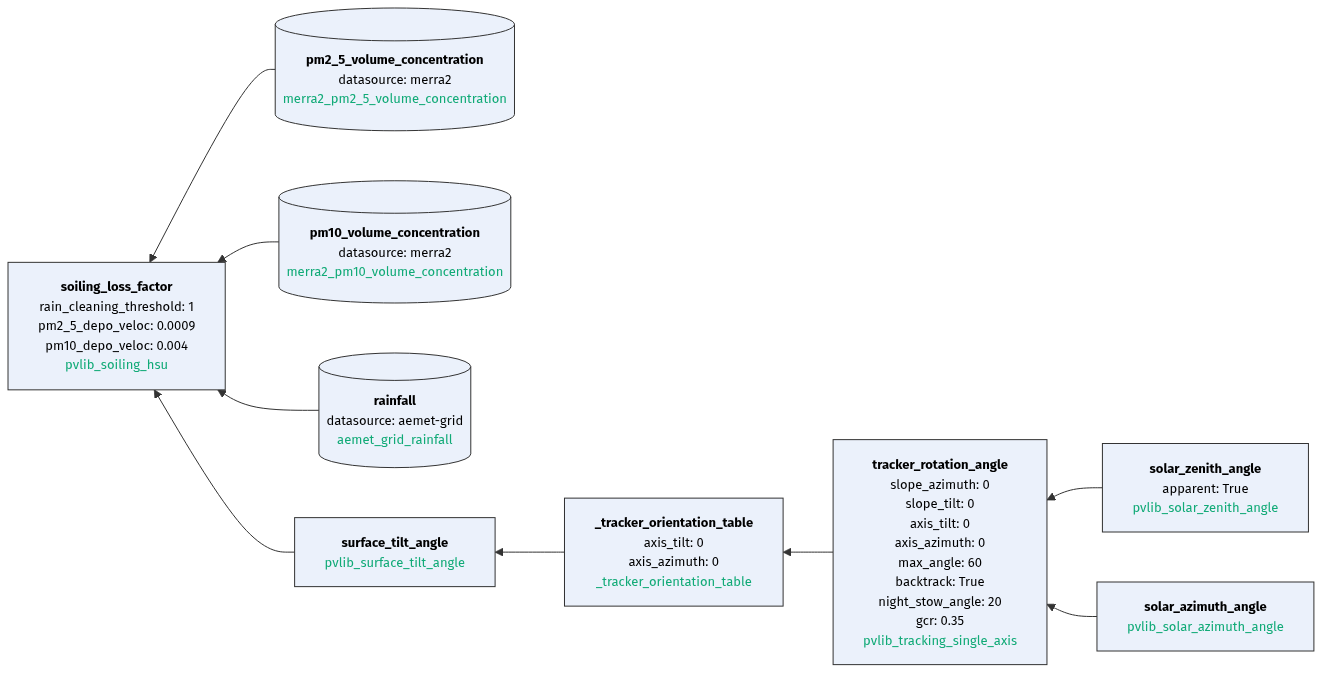

In [7]:
site.profile(my_soiling_model).display_flowchart()

## Plot soiling loss factor and most important inputs

Get access to dozens of resource types in a single line of code and using our R-Notation to specify the desired unit, frequency and datasource. Check our [Resource DB](https://pvradar.notion.site/1d157af8487c80d68be3ce9473e9bbba?v=1d157af8487c81759b9f000cecd9245f) for a complete list. 

In [8]:
rainfall = site.resource(R.rainfall(to_unit='cm', to_freq='D'))
pm2_5 = site.resource(R.pm2_5_volume_concentration(to_unit='g/m^3', to_freq='D'))
pm10 = site.resource(R.pm10_volume_concentration(to_unit='g/m^3', to_freq='D'))

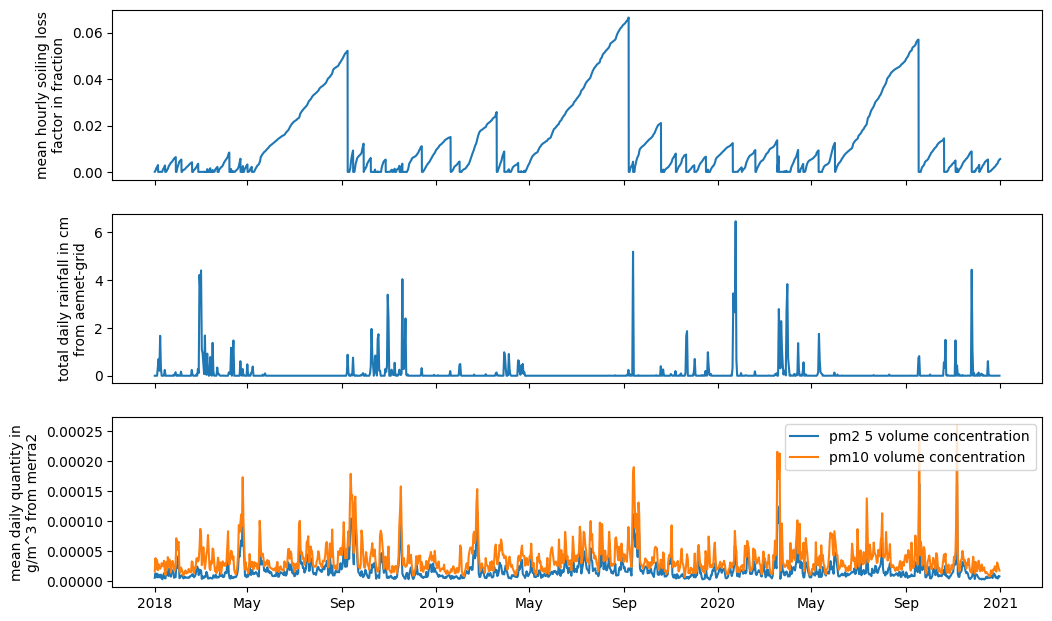

In [9]:
resource_plot(soiling_loss_factor, rainfall, pm2_5, pm10)

## Compare energy yield with and without soiling

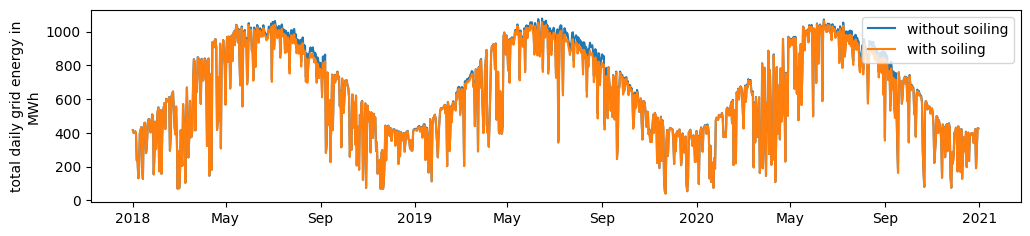

In [10]:
# Energy without soiling losses
energy_without_soiling = site.resource(R.grid_energy(to_unit='MWh', to_freq='D'), label='without soiling')

# Energy with soiling losses
with site.hooks(for_resource(R.soiling_loss_factor).use_model(my_soiling_model)):
    energy_with_soiling = site.resource(R.grid_energy(to_unit='MWh', to_freq='D'), label='with soiling')

# Plot both
resource_plot(energy_without_soiling, energy_with_soiling)

## Summary: How much energy is lost to soiling?

In [11]:
# Average soiling loss factor (as %)
print(f'The average soiling loss factor is: {soiling_loss_factor.mean()*100:.2f}%')

# Actual share of energy lost (as %)
soiling_energy_loss_fraction = (energy_without_soiling.sum() - energy_with_soiling.sum()) / energy_without_soiling.sum()
print(f'The share of energy actually lost is: {soiling_energy_loss_fraction*100:.2f}%')

The average soiling loss factor is: 1.29%
The share of energy actually lost is: 1.50%


# 

# **Conclusion: Why use PVRADAR for soiling loss modeling?**

With just a few lines of code, you built a fully functional soiling loss model, validated it with real-world data, and quantified its impact on energy yield.

But this is just the beginning.

## Model and optimize the real-world behavior of your PV plants

PVRADAR allows you to model the effect of **any technical or environmental factor** on plant performance — not just soiling:
- Combine soiling, snow, albedo, clipping, battery storage, and more in a single modeling workflow.
- Quantify impacts in terms of energy yield, PR, LCOE, and financial KPIs.
- Explore what-if scenarios and optimize plant design and O&M strategies.

## Build internal tools and advanced applications

With PVRADAR, you can turn your models into robust, organization-wide tools:
- Build internal web apps that allow colleagues to apply validated models without writing code.
- Standardize modeling across teams and projects.
- Automate reporting and performance analysis to save time and ensure consistency.

## One Python line away from your data

The PVRADAR SDK simplifies data access:
- Seamlessly connect to satellite data, meteo stations, and internal performance databases.
- Standardize and pre-process data for modeling — ready to use in one line of Python.
- Keep full control over your data, whether in the cloud or on-premises.

## Supported by deep expertise

PVRADAR is more than software — it is backed by industry-leading expertise:
- Model validation and tuning with high-quality reference data.
- Consulting and support on soiling losses, soiling, O&M optimization, and yield forecasting.
- Proven track record with leading IPPs, developers, and consultants.

👉 **Ready to go further?** [**Contact us to learn how we can help solve your modeling challenge!**](https://pvradar.com/contact)
